# Regresión Polinomial con scikit-learn
La implementación de la regresión polinomial con scikit-learn es muy similar a la regresión lineal. Solo hay un paso adicional: debe transformar la matriz de entradas para incluir términos no lineales como 𝑥².
### 1. Importar paquetes y clases
Además de **numpy** y **sklearn.linear_model.LinearRegression**, también debe importar la clase **PolynomialFeatures de sklearn.preprocessing**:

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

### 2. Proporcionar datos

In [ ]:
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([28, 11, 2, 9, 29, 30])

Ya tenemos las dos matrices: la entrada, **x** y la salida **y**. Debe llamar a la función **reshape()** a **x** porque esta matriz debe ser bidimensional, o más precisamente, debe tener una columna y tantas filas como sea necesario. Eso es exactamente lo que especifica el argumento (-1, 1) de **reshape()**.

In [ ]:
x

array([[ 5],
       [15],
       [25],
       [35],
       [45],
       [55]])

In [ ]:
x.shape

(6, 1)

In [ ]:
y

array([28, 11,  2,  9, 29, 30])

In [ ]:
y.shape

(6,)

Ahora podemos ver que **x** tiene dos dimensiones, mientras que **y** tiene una sola dimensión.

Veamos la distribución de los datos:

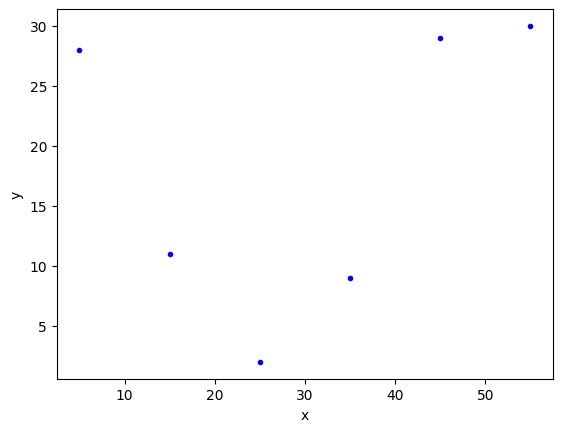

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x, y, "b.")  # círculos azules
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### 3. Transformar datos de entrada
Este es el nuevo paso que debe implementar para la regresión polinomial

Debemos incluir los valores de 𝑥², y quizás otros términos, como características adicionales al implementar la regresión polinomial. Por esa razón, debe transformar la matriz de entrada **x** para que contenga columnas adicionales con los valores de 𝑥² y, eventualmente, más características.

Es posible transformar la matriz de entrada de varias maneras, como usar **insert()** from numpy. Pero la clase **PolynomialFeatureses** ya viene preparada para esto.

Creamos una instancia de esta clase indicando el grado de polinomio que deseamos:

In [ ]:
transformer = PolynomialFeatures(degree=2, include_bias=False)

La variable **transformer** proporciona varios parámetros opcionales para la clase **PolynomialFeatures**:
* **degreees** un número entero (igual a 2 por defecto) que representa el grado de la función de regresión polinomial.
* **interaction_only** es un valor booleano (False por defecto) que decide si incluir solo funciones de interacción (True) o todas las funciones (False).
* **include_biases** un valor booleano (True por defecto) que decide si incluir o no, la columna de 1 valor de sesgo o intercepción ( ).

En este ejemplo utilizamos los valores por default en todos los parámetros excepto include_bias.

Paso siguiente aplicar a la variable **transformer** el método **fit()**:

In [ ]:
transformer.fit(x)

PolynomialFeatures(include_bias=False)

Una vez aplicado la función **fit()**, podemos crear una nueva matriz de entrada modificada aplicando la función **transform()**:

In [ ]:
x_ = transformer.transform(x)

In [ ]:
x_

array([[   5.,   25.],
       [  15.,  225.],
       [  25.,  625.],
       [  35., 1225.],
       [  45., 2025.],
       [  55., 3025.]])

Esta transformación toma la matriz de entrada como argumento y devuelve la matriz modificada. La matriz de entrada modificada contiene dos columnas: una con las entradas originales y la otra con sus cuadrados

También puede usar **fit_transform()** para reemplazar las declaraciones anteriores con solo una:
* x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x)

### 3. Crear un modelo y entrenarlo

In [ ]:
model = LinearRegression().fit(x_, y)

El modelo de regresión ahora está creado y entrenado. Está listo para hacer predicciones. Se debe tener en cuenta que el primer argumento de **fit()** es la matriz de entrada modificada **x_** y no la original **x**.

Podemos calcular los coeficientes w1, w2 y b

In [ ]:
print(f"coefficients: {model.coef_}")

coefficients: [-2.00428571  0.03678571]


In [ ]:
print(f"intercept: {model.intercept_}")

intercept: 34.45892857142857


### 4. Calcular 𝑅²

In [ ]:
r_sq = model.score(x_, y)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.7687521801173298


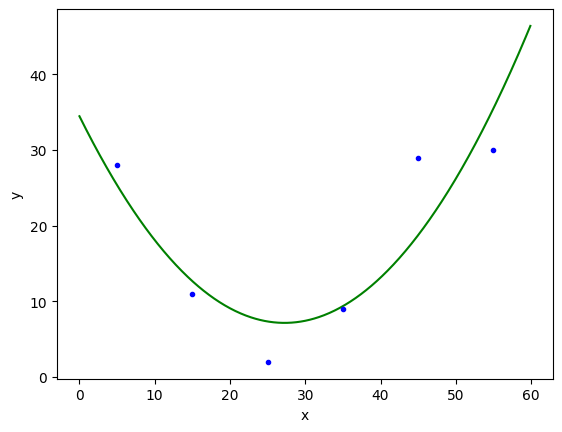

In [ ]:
# Representación gráfica de la función hipótesis generada
x1 = np.arange(0,60,0.1)
y1 = model.coef_[(0)]*x1 + model.coef_[(1)]*(x1**2) + model.intercept_

plt.plot(x1, y1, "g-")  # estilo de linea solida verde
#plt.plot(df['X'], df['Y'], "b.")
plt.plot(x, y, "b.")  # círculos azules
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Ver mas ejemplos en:

https://thedataschools.com/python/regresion-polinomial/